# Task 6 : Prediction of Iris Flower Species using Decision Tree Algorithm

#### Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
def splitkeyword(string):
    string = string.split('-')
    return string[1]

iris['Species'] = iris['Species'].apply(lambda x:splitkeyword(x))
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [61]:
### Creating a mapper for the Species,as for classification we need numerical data!==>

species_list = list(iris['Species'].unique())
mapper = {species_list[i]:i+1 for i in range(len(species_list))}
mapper

{'setosa': 1, 'versicolor': 2, 'virginica': 3}

In [62]:
iris['Class'] = iris['Species'].map(mapper)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [63]:
iris['Class'].value_counts()

1    50
2    50
3    50
Name: Class, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Class', ylabel='count'>

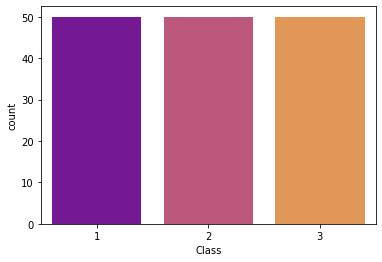

In [64]:
sn.countplot(iris['Class'],palette='plasma')

In [65]:
## dropping the id column

iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [66]:
# For now i will be dropping the species column,as we're about to start the model building
# once i get the predicted results,i will remap the Actual species and Predicted Species.

species = list(iris['Species'])
iris = iris.drop(['Species'],axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [67]:
# If we make an observation here,the Class Feature is in continous order,i.e the values are not jumbled
# First 50 rows are of class 1,next 50 are of class 2,and next 50 are of class 3,so its in an order we can say
# When we're working on Tree based Classifiers,they generally try to predict all the classes perfectly!,
# We cannot know how the model has performed,so a kind of Shuffling must be done,so that the model can get some unordered
# Data in its way and then we can get the correct intuation of this!,so i'll be using the sample(frac = 1) of pandas
# frac = 1 means we're trying to shuffle the data row wise.

iris = iris.sample(frac=1).reset_index()
iris = iris.drop(['index'],axis = 1)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,6.8,2.8,4.8,1.4,2
1,5.7,2.8,4.5,1.3,2
2,5.5,2.5,4.0,1.3,2
3,5.8,2.7,4.1,1.0,2
4,4.9,3.1,1.5,0.1,1


In [68]:
## renaming the column names

iris.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,6.8,2.8,4.8,1.4,2
1,5.7,2.8,4.5,1.3,2
2,5.5,2.5,4.0,1.3,2


In [71]:
## Splitting the data into training and testing

y = iris['Class']
X = iris.drop(['Class'],axis = 1)
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.8,2.8,4.8,1.4
1,5.7,2.8,4.5,1.3
2,5.5,2.5,4.0,1.3
3,5.8,2.7,4.1,1.0
4,4.9,3.1,1.5,0.1


In [72]:
# Splitting the data into train and test 80% training,20% validation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
X_train.shape,X_test.shape

((135, 4), (15, 4))

In [79]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred = tree_classifier.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.86      0.92         7
           3       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.95      0.94        15
weighted avg       0.94      0.93      0.93        15



In [78]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [82]:
# Printing confusion matrix 
print(confusion_matrix(y_test,y_pred))
# Printing accuracy
print(accuracy_score(y_test,y_pred))

[[3 0 0]
 [0 6 1]
 [0 0 5]]
0.9333333333333333


C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



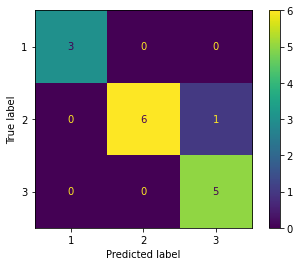

In [83]:
from sklearn.metrics import plot_confusion_matrix

#plot confusion matrix
plot_confusion_matrix(tree_classifier,X_test,y_test)
plt.show()

In [80]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
14,2,2
98,2,2
75,3,3
16,3,3
131,3,3
56,1,1
141,3,3
44,2,3
29,2,2
120,3,3


In [92]:
# Importing required packages for visualization
from sklearn import tree

# Putting all feature names in a list
features = list(iris.columns[1:])

#Putting all classes in list i.e >=50 and <=50
cls=['setosa', 'versicolor','virginica'
]

In [93]:
#Printing features names
print(features)
print("-----------------------------")
#Printing classes names
print(cls)

['SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
-----------------------------
['setosa', 'versicolor', 'virginica']


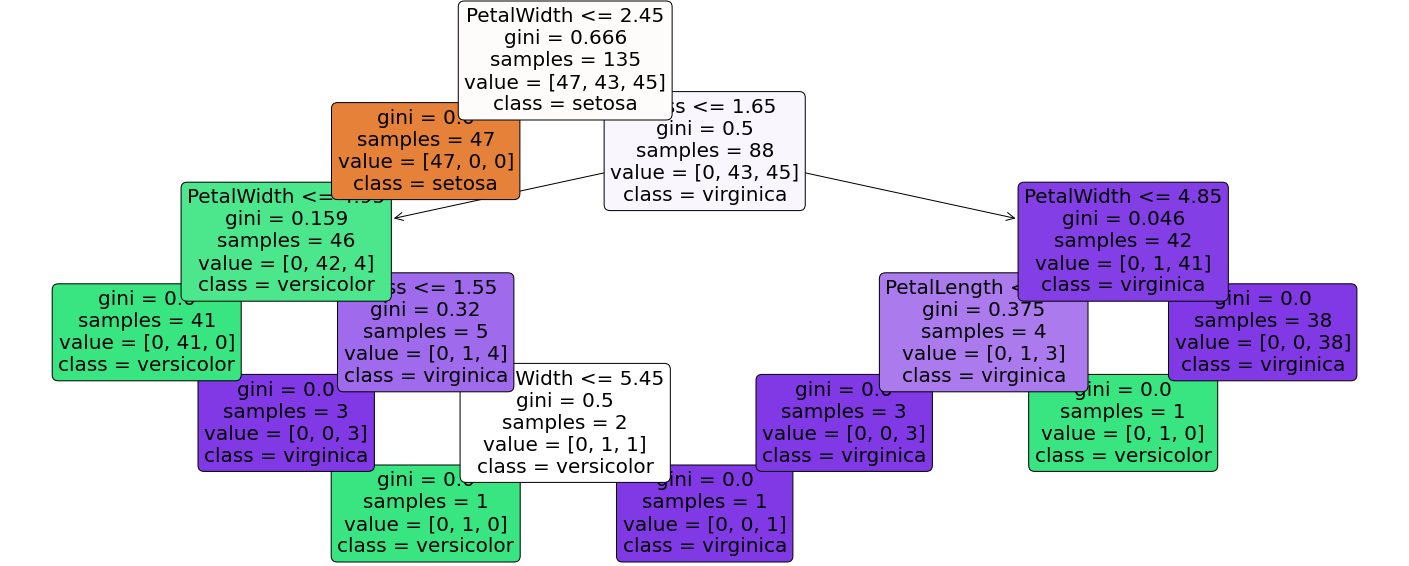

In [99]:
plt.figure(figsize=(25,10))
plt.tight_layout()
a= tree.plot_tree(tree_classifier,
                 feature_names = features,
                 class_names=cls,
                 filled=True,
                 rounded=True,
                 fontsize=20)
